In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/codesoft datasets/IRIS.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#view the first few rows of a DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#quickly understanding the basic statistical properties of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [8]:
#method used to compute the correlation between columns in a pandas DataFrame
df.corr()

<ipython-input-8-0da33a4e28fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [9]:
#to group the df by a specific column ('species' in this case) and then calculate the mean of each group for all other columns
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [11]:
#converting categorical to numerical
def converter(s):
  s = s.lower()
  if s == 'iris-setosa':
    return 0
  elif s == 'iris-versicolor':
    return 1
  elif s == 'iris-virginica':
    return 2
  else:
    return -1
df = pd.read_csv("/content/drive/MyDrive/codesoft datasets/IRIS.csv",converters = {"species":converter})
df.shape

(150, 5)

In [12]:
#We can see that species names are converted from Iris-setosa, Iris-versicolor, Iris-virginica to 0,1,2 respectively
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

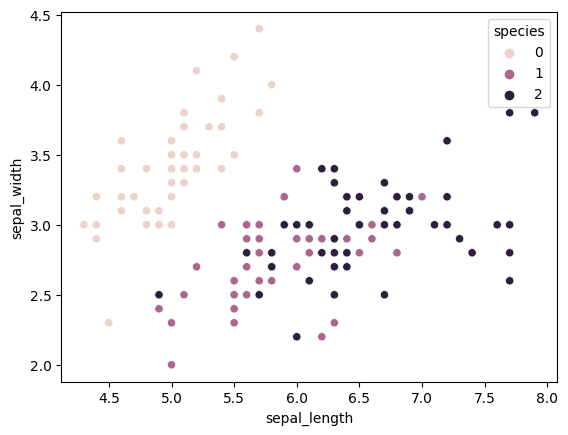

In [14]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

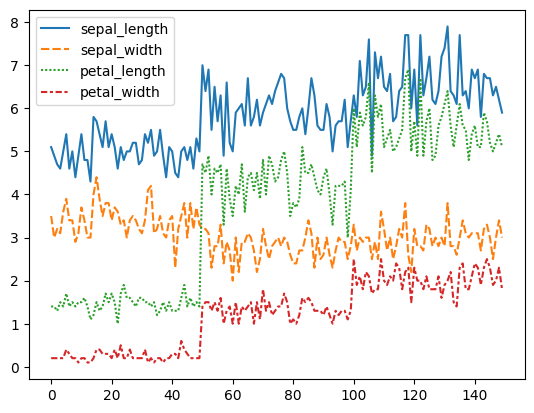

In [15]:
sns.lineplot(data=df.drop(['species'], axis=1))
plt.show()

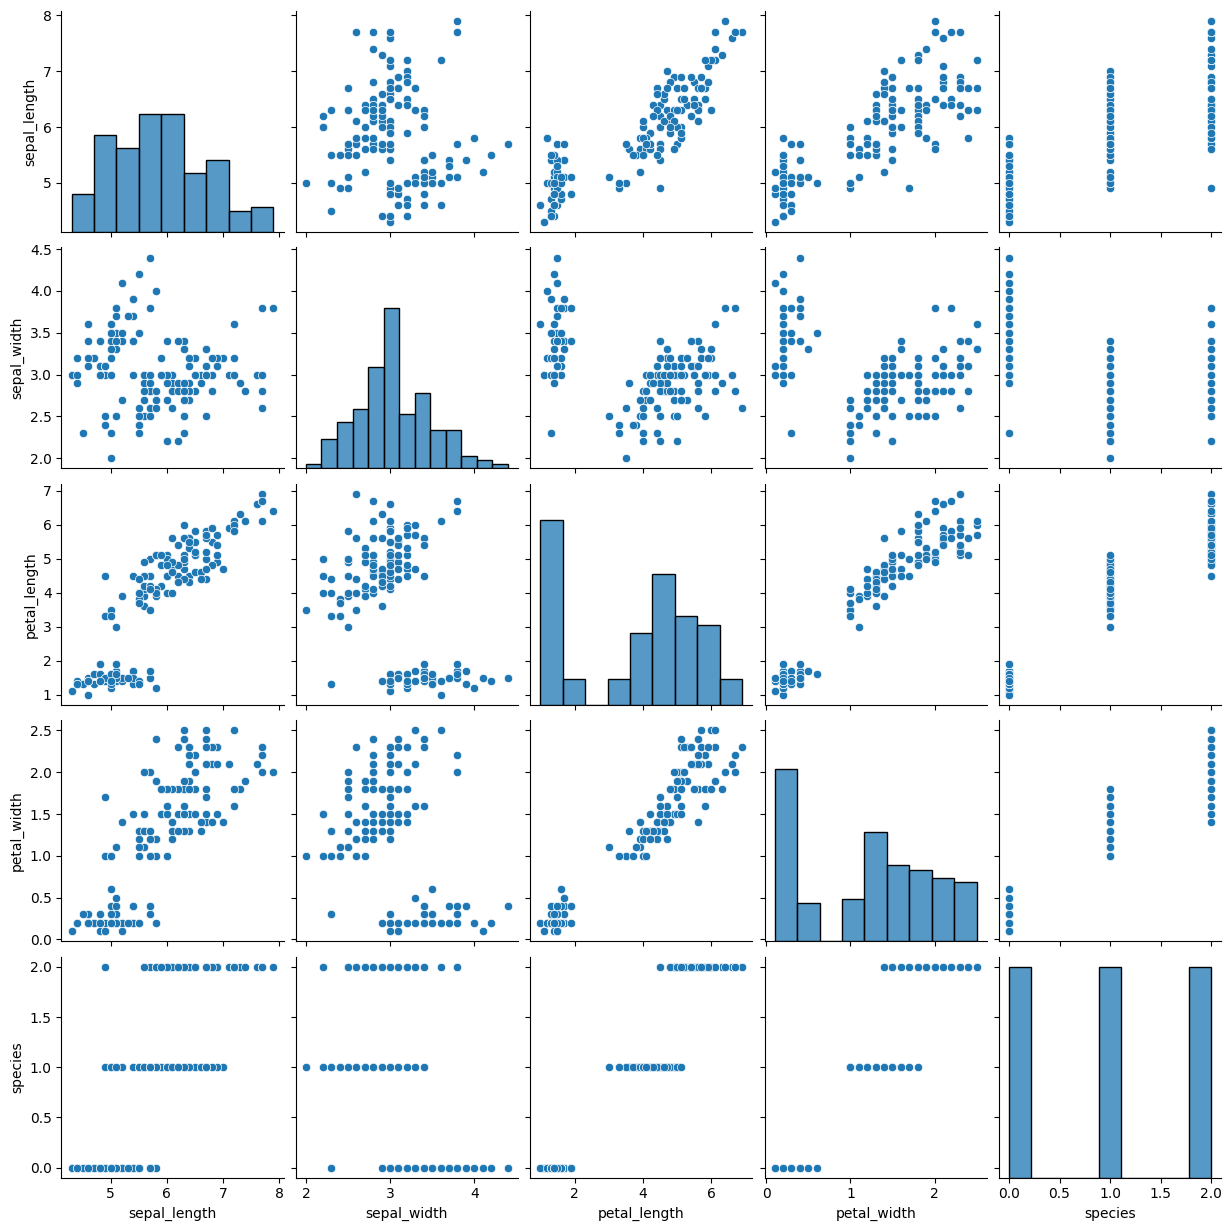

In [16]:
sns.pairplot(df)

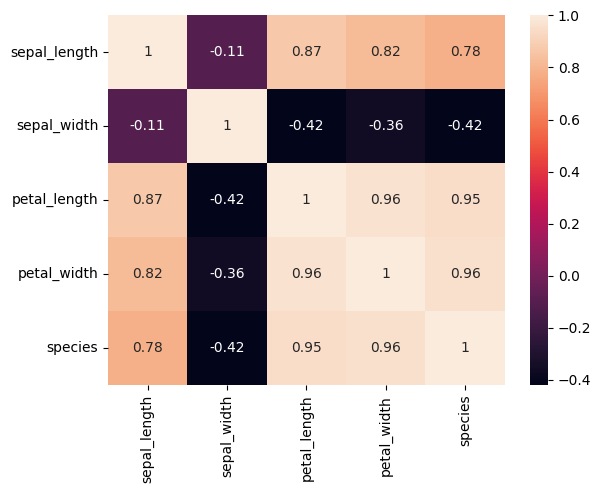

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
features = df[['sepal_length','sepal_width','petal_length','petal_width']]
labels = df["species"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3)

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
#print intercept
print(lm.intercept_)

0.33880101260490214


In [23]:
predictions=lm.predict(X_test)



In [24]:
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE : 0.18438524736970546
MSE : 0.061327591051836806
RMSE : 0.2476440813987623


In [25]:
from sklearn import metrics

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(features, labels)
labels_pred = logreg.predict(features)
print(metrics.accuracy_score(labels, labels_pred))

0.9733333333333334


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9555555555555556

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       0])

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))
cm

Accuracy : 0.9111111111111111


array([[15,  0,  0],
       [ 0, 15,  3],
       [ 0,  1, 11]])

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)#Create Gaussian Classifier
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9333333333333333


In [32]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [33]:
model.predict(X_test)

array([0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       0])

In [34]:
model.score(X_train,y_train)


1.0

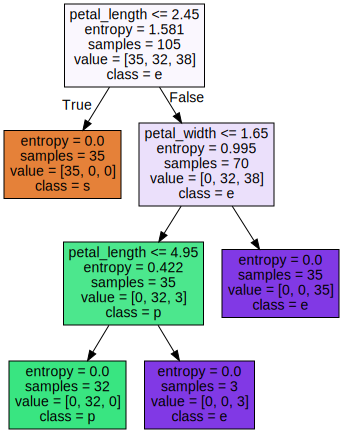

In [35]:
import graphviz
from sklearn import tree
#Dot Data
dot_data = tree.export_graphviz(model,out_file=None,
                                feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                                class_names = "species",
                                filled=True)
#Draw graph
graph = graphviz.Source(dot_data,format = "png")
graph